In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

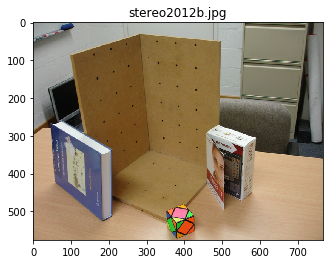

In [3]:
img = cv2.imread("img\\stereo2012b.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title("stereo2012b.jpg")
plt.imshow(img)
plt.show()

In [4]:
# H, W, _ = img.shape
# py = H / 2
# px = W / 2

# print("H:", H, ", W:", W, ", py:", py, ", px:", px)

uv: (12, 2) 
 [[344.29392306 303.36277873]
 [389.77297231 317.47696643]
 [339.58919383 257.88372948]
 [386.63648616 270.4296741 ]
 [273.72298456 314.34048027]
 [269.01825533 268.86143102]
 [232.94866454 286.11210488]
 [239.22163685 337.86412644]
 [316.06554766 370.79723107]
 [287.83717226 395.88912031]
 [361.54459691 384.91141877]
 [331.74797844 411.57155109]]
N:


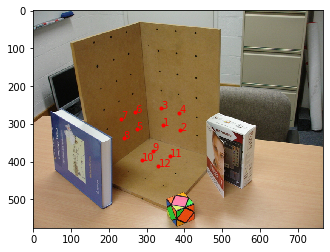

In [7]:
uv_path = ".\\code\\uv.npy"
uv = np.load(uv_path)
N = uv.shape[0]

print("uv:", uv.shape, "\n", uv)
print("N:", )

plt.imshow(img)
counter = 1
for x, y in uv:
    plt.plot(x, y, ".", color="red")
    plt.text(x, y, str(counter),  color="red")
    counter += 1
plt.show()

In [9]:
L = 7      # distance between points in cm

XYZ = [
    [1, 1, 0],
    [2, 1, 0],
    [1, 2, 0],
    [2, 2, 0],
    [0, 1, 1],
    [0, 2, 1],
    [0, 2, 2],
    [0, 1, 2],
    [1, 0, 1],
    [1, 0, 2],
    [2, 0, 1],
    [2, 0, 2]
]
XYZ = np.array(XYZ) * L

print("XYZ:", XYZ.shape, "\n", XYZ)

XYZ_path = ".\\code\\XYZ.npy"
np.save(XYZ_path, XYZ)

XYZ: (12, 3) 
 [[ 7  7  0]
 [14  7  0]
 [ 7 14  0]
 [14 14  0]
 [ 0  7  7]
 [ 0 14  7]
 [ 0 14 14]
 [ 0  7 14]
 [ 7  0  7]
 [ 7  0 14]
 [14  0  7]
 [14  0 14]]


In [10]:
"""
Input: 
    im: is the image of the calibration target.
    XYZ: is a Nx3 array of XYZ coordinates of the calibration target points.
    uv: is a N x 2 array of the image coordinates of the calibration target
        points.
Outputs: 
    C: is the 3 x 4 camera calibration matrix.
"""

def calibrate(im, XYZ, uv):
    n = uv.shape[0]
    A = []
    for i in range(n):
        x, y = uv[i]
        X, Y, Z = XYZ[i]
        A.append([X, Y, Z, 1, 0, 0, 0, 0, -x * X, -x * Y, -x * Z, -x])
        A.append([0, 0, 0, 0, X, Y, Z, 1, -y * X, -y * Y, -y * Z, -y])
#     A = np.array(A).astype(np.int)
    A = np.array(A).astype(np.float32)

#     print(A.shape, "\n", A)

    C = np.linalg.svd(A)[-1][-1]
    C = C / C[-1]
    C = C.reshape((3, -1))
    print("C:", C.shape, "\n", C)
    return C

In [11]:
C = calibrate(img, XYZ, uv)

X_ = XYZ.T
n = X_.shape[1]
X_ = np.vstack((X_, np.ones((1, n))))
print(C.shape, "*", X_.shape)
xnew = np.dot(C, X_)
xnewt = np.transpose(xnew)

x1 = np.empty((n,1))
x2 = np.empty((n,1))
for i in range(0,n):
    x1[i] = xnewt[i][0] / xnewt[i][2]
    x2[i] = xnewt[i][1] / xnewt[i][2]
    
x_proj = np.hstack((x1,x2))
xt = np.transpose(uv.T)

xorg = xt[:,0]
yorg = xt[:,1]
xproj = x_proj[:,0]
yproj = x_proj[:,1]

C: (3, 4) 
 [[ 3.9021595e+00 -1.9126394e+00 -5.9482784e+00  3.0649390e+02]
 [-4.0742330e-02 -7.3505692e+00  6.9656557e-01  3.3595526e+02]
 [-5.0523691e-03 -4.6766042e-03 -6.5600146e-03  1.0000000e+00]]
(3, 4) * (4, 12)


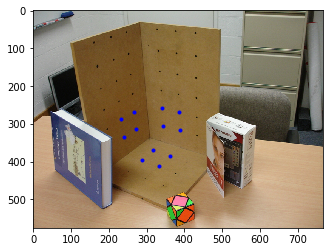

In [12]:
plt.imshow(img)
for xx,yy in zip(xproj,yproj):
    circ = plt.plot(xx, yy, ".",color='blue')
plt.show()

In [70]:
from PIL import Image

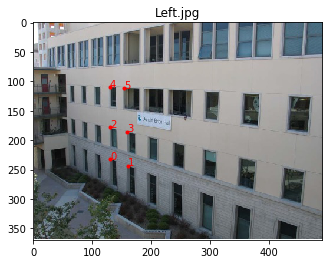

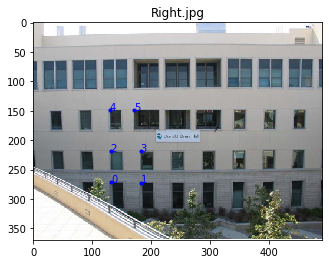

In [71]:
img_dir = ".\\img\\"
data_dir = ".\\code\\"
N_corr = 6

L_path = "Left.jpg"
R_path = "Right.jpg"
uv_left_path = "uv_left.npy"
uv_right_path = "uv_right.npy"

L_img = Image.open(img_dir + L_path)
R_img = Image.open(img_dir + R_path)

plt.title(L_path)
plt.imshow(L_img)
# uv_left = plt.ginput(N_corr)
uv_left = np.load(data_dir + uv_left_path)
for i in range(N_corr):
    plt.plot(uv_left[i][0], uv_left[i][1], ".", color="r")
    plt.text(uv_left[i][0], uv_left[i][1], i, color="r")
plt.show()

plt.title(R_path)
plt.imshow(R_img)
# uv_right = plt.ginput(N_corr)
uv_right = np.load(data_dir + uv_right_path)
for i in range(N_corr):
    plt.plot(uv_right[i][0], uv_right[i][1], ".", color="b")
    plt.text(uv_right[i][0], uv_right[i][1], i, color="b")
plt.show()


In [72]:
print("uv_left: ", uv_left)
uBase = uv_left[:, 0]
vBase = uv_left[:, 1]
print("uBase: ", uBase)
print("vBase: ", vBase)

uv_left:  [[130.86638473 232.58417365]
 [160.22748563 243.32603983]
 [130.15026032 178.15871833]
 [159.51136122 185.31996245]
 [130.15026032 110.12689918]
 [153.78236592 110.84302359]]
uBase:  [130.86638473 160.22748563 130.15026032 159.51136122 130.15026032
 153.78236592]
vBase:  [232.58417365 243.32603983 178.15871833 185.31996245 110.12689918
 110.84302359]


In [73]:
print("uv_right: ", uv_right)
u2Trans = uv_right[:, 0]
v2Trans = uv_right[:, 1]
print("u2Trans: ", u2Trans.shape[0])

uv_right:  [[132.37770563 271.19372294]
 [183.43290043 272.19480519]
 [131.37662338 219.13744589]
 [182.43181818 219.13744589]
 [129.37445887 149.06168831]
 [171.41991342 149.06168831]]
u2Trans:  6


In [74]:
def homography(u2Trans, v2Trans, uBase, vBase):
    n = u2Trans.shape[0]
    # A = np.zeros((n * 2, 9))
    A = []
    for i in range(n):
        a1 = [0, 0, 0, -uBase[i], -vBase[i], -1, v2Trans[i] * uBase[i], v2Trans[i] * vBase[i], v2Trans[i]]
        a2 = [uBase[i], vBase[i], 1, 0, 0, 0, -u2Trans[i] * uBase[i], -u2Trans[i] * vBase[i], -u2Trans[i]]
        A.append(a1)
        A.append(a2)
    A = np.array(A)
    H = np.linalg.svd(A)[-1][-1]
    H = H / H[-1]
    H = H.reshape((3, -1))
    return H

In [75]:
H = homography(u2Trans, v2Trans, uBase, vBase)
H.shape

(3, 3)

In [76]:
H

array([[ 3.49159709e+00,  9.55220683e-02, -2.63451764e+02],
       [ 5.11482719e-01,  1.69131436e+00, -2.00283439e+01],
       [ 3.88926025e-03,  4.81957769e-04,  1.00000000e+00]])

In [77]:
def wrap(uv, H):
    uv_h = np.hstack((uv, np.ones((uv.shape[0], 1)))).T
    uv_trans = np.dot(H, uv_h)
    uv_trans /= uv_trans[-1, :]
    uv_trans = uv_trans.T[:, :2]
    return uv_trans

In [78]:
uv_left_trans = wrap(uv_left, H)
uv_left_trans

array([[133.05900137, 271.59883658],
       [183.42557072, 272.03826072],
       [130.6480175 , 218.50002291],
       [182.02036939, 219.33310065],
       [129.2276094 , 149.30143909],
       [172.01246684, 149.01356471]])

In [79]:
uv_right

array([[132.37770563, 271.19372294],
       [183.43290043, 272.19480519],
       [131.37662338, 219.13744589],
       [182.43181818, 219.13744589],
       [129.37445887, 149.06168831],
       [171.41991342, 149.06168831]])

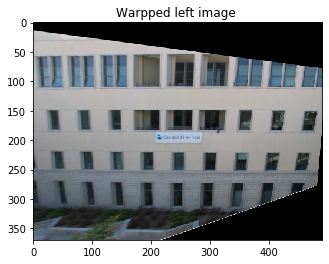

In [80]:
w, h, _ = np.array(L_img).shape
L_img_warp = cv2.warpPerspective(np.array(L_img), H, (h, w))
plt.title("Warpped left image ")
plt.imshow(L_img_warp)
plt.show()